In [1]:
import sys
# Specify the directory where your data is located
project_dir = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
sys.path.append(project_dir)


import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from src.utils import central_tendances, calculate_quartiles, histogram_plot, bar_plot
import sys



# Specify the directory where your data is located
data_directory = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
os.chdir(data_directory)

sys.path.append("D:\\2M\D.Mining\Data-Mining-Project\\")

In [2]:
import warnings

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

## Load data


In [3]:
df = pd.read_csv(
    "data/interim/03_temp_dataset_processed_outliers_removed.csv", index_col=0
)

## Data Exploration


### General Information


In [4]:
df.head(10)

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
Midpoint Date,,,,,,,,
2019-07-02,94085,23223.0,46.0,46.0,0.0,0.2,0.0,100.0
2019-07-02,94086,50477.0,50.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,95127,66256.0,66.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,95128,36975.0,110.0,0.0,0.0,0.3,0.0,0.0
2020-01-22,94085,23223.0,46.0,0.0,0.0,0.2,0.0,0.0
2020-01-22,94086,50477.0,100.0,50.0,0.0,0.2,0.0,50.0
2020-01-22,95129,39741.0,39.0,0.0,0.0,0.1,0.0,0.0
2020-03-04,94085,23223.0,487.0,146.0,139.0,2.1,0.6,30.0
2020-03-04,94086,50477.0,403.0,151.0,151.0,0.8,0.3,37.5


In [5]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 2019-07-02 to 2022-10-26
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             264 non-null    int64  
 1   population       264 non-null    float64
 2   test count       264 non-null    float64
 3   positive tests   264 non-null    float64
 4   case count       264 non-null    float64
 5   test rate        264 non-null    float64
 6   case rate        264 non-null    float64
 7   positivity rate  264 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.6+ KB


""


In [6]:
df.describe()

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,94628.034091,47743.867424,3933.943182,112.049242,148.651515,398.103030,9.788636,4.569318
std,511.911466,17246.898991,2599.982600,101.154822,153.354605,240.433429,10.244636,8.961341
min,94085.000000,23223.000000,39.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,94086.000000,36975.000000,1958.000000,35.000000,46.750000,227.750000,2.900000,1.100000
50%,95035.000000,50477.000000,3398.000000,84.000000,97.000000,390.650000,6.900000,2.400000
75%,95128.000000,56668.000000,5883.250000,159.250000,191.500000,577.175000,13.300000,4.700000
max,95129.000000,79655.000000,11016.000000,441.000000,813.000000,1221.500000,57.400000,100.000000


## Visualization


In [7]:
# change the type of zcta to object
df["zcta"] = df["zcta"].astype("str")

### 1. Distribution of the total number of confirmed cases and positive tests by zones

(Indication :Tree Map/Bar chart)


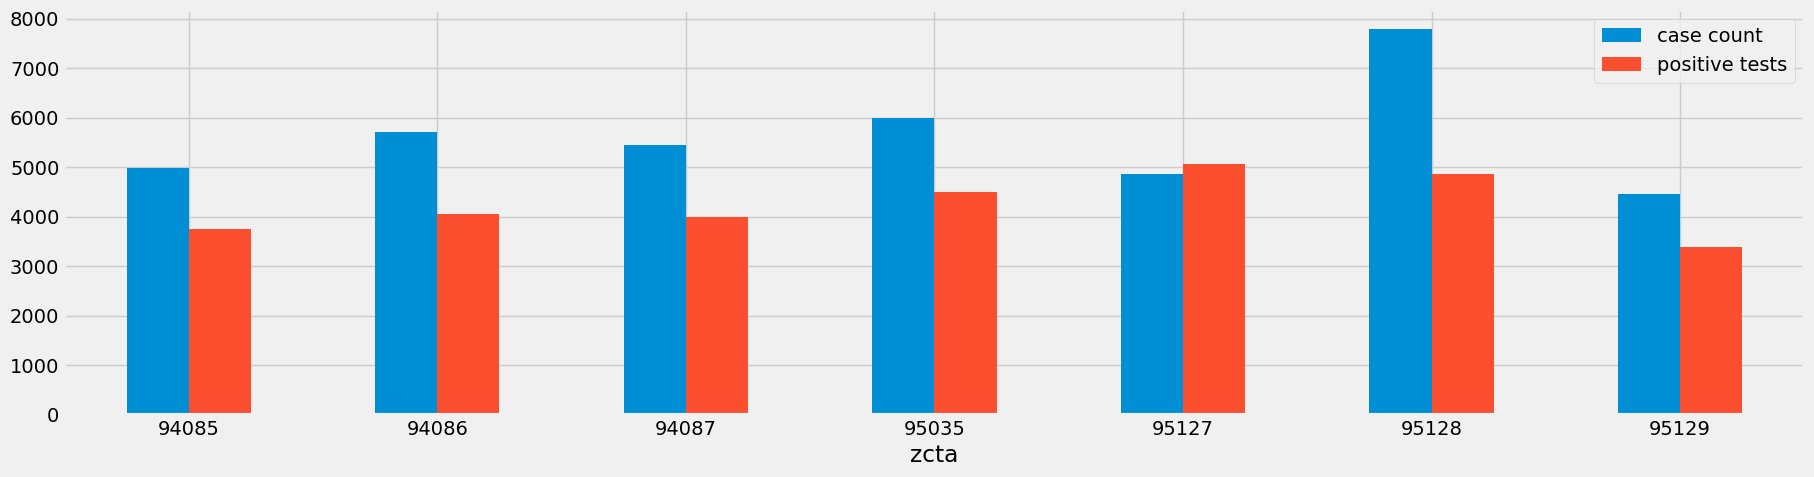

In [8]:
# 1. Distribution of the total number of confirmed cases and positive tests by zones bar plot
df.groupby("zcta")[["case count", "positive tests"]].sum().plot(
    kind="bar", figsize=(20, 5), rot=0
)
plt.savefig('reports/figures/02_TSA_2/01_distribution_of_the_total_number_of_confirmed_cases_and_positive_tests_by_zones_bar_plot.png')

### 2. How do COVID-19 tests, positive tests, and the number of cases evolve over time (weekly, monthly, and annually) for a chosen area?

(Indication: Line chart)


In [63]:
zones = df['zcta'].unique()
choosen_zone = zones[0]
selected_data = df[df['zcta'] == choosen_zone][['case count', 'test count', 'positive tests']]
df.index = pd.to_datetime(df.index)

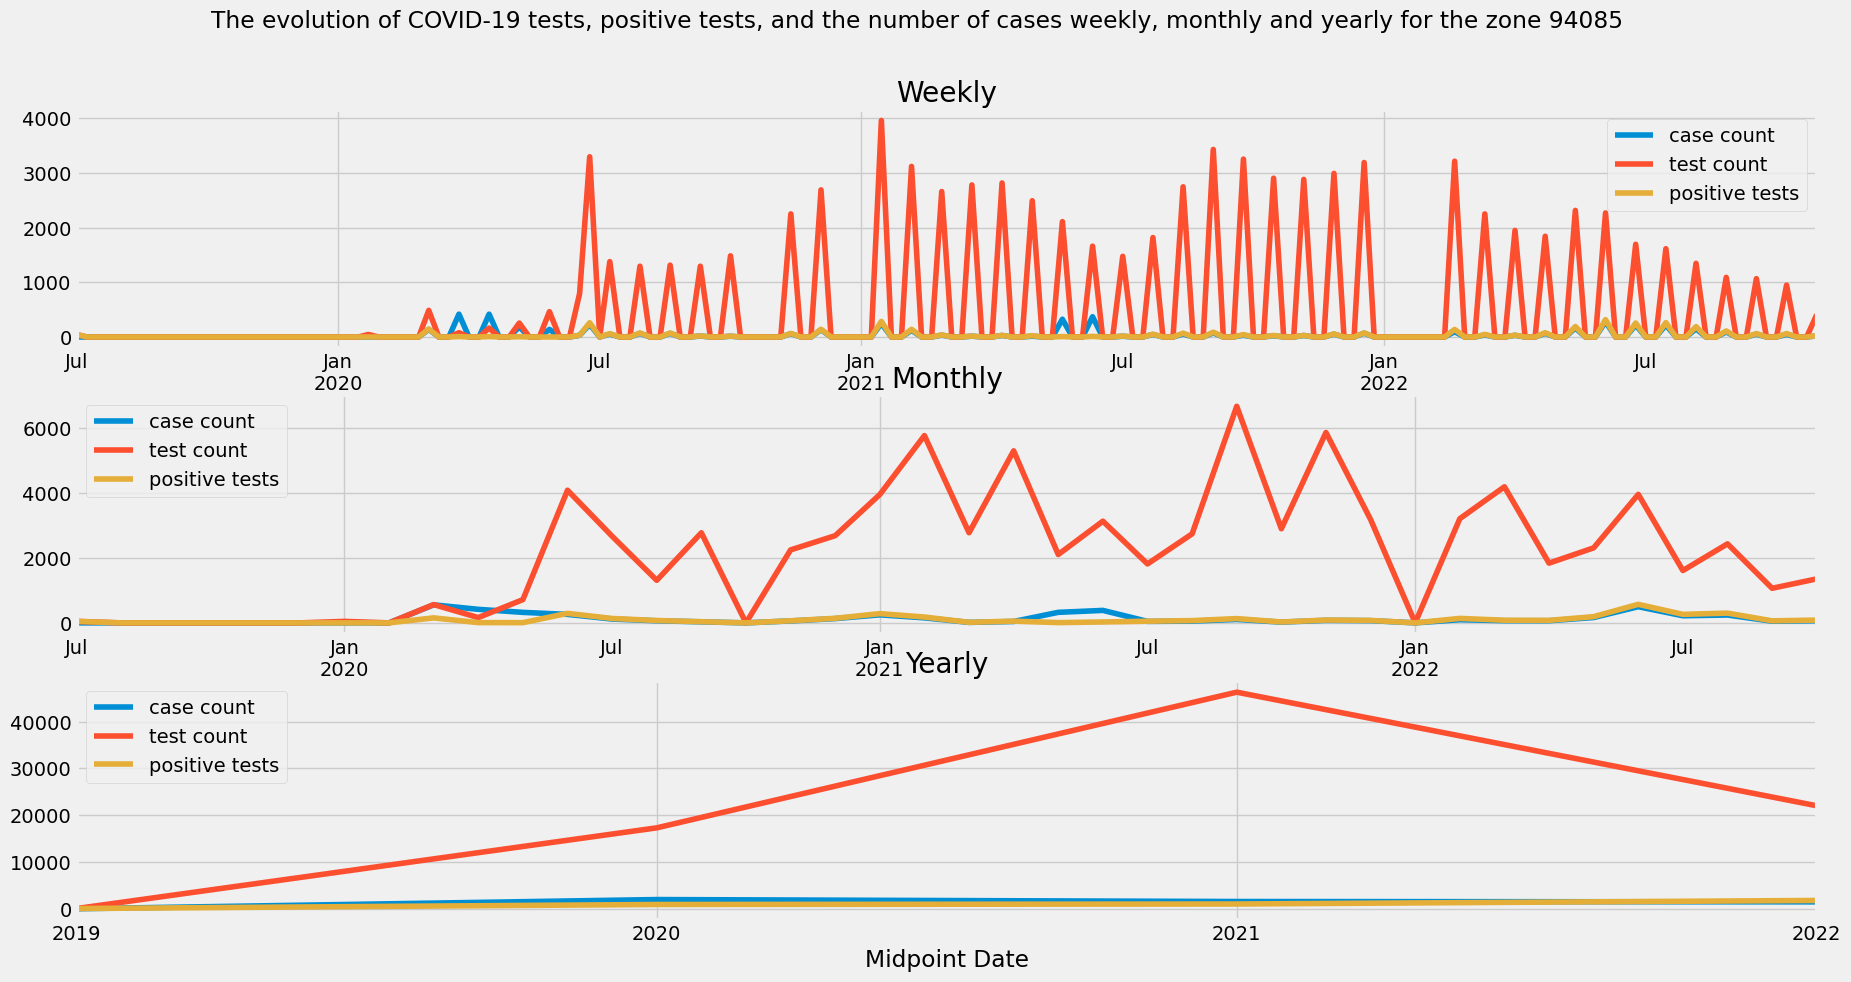

In [64]:
weekly_data = selected_data.resample("W").sum()
monthly_data = selected_data.resample("M").sum()
yearly_data = selected_data.resample("Y").sum()

# The evolution of COVID-19 tests, positive tests, and the number of cases weekly 
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
fig.suptitle(f"The evolution of COVID-19 tests, positive tests, and the number of cases weekly, monthly and yearly for the zone {choosen_zone}")
weekly_data.plot(ax=axs[0], title="Weekly")
monthly_data.plot(ax=axs[1], title="Monthly")
yearly_data.plot(ax=axs[2], title="Yearly")
fig.savefig(f'reports/figures/02_TSA_2/02_evolution_over_time_for_{choosen_zone}.png')

### 3. How are positive COVID cases distributed by zone and by year?

(Guidance: Stacked Bar chart)


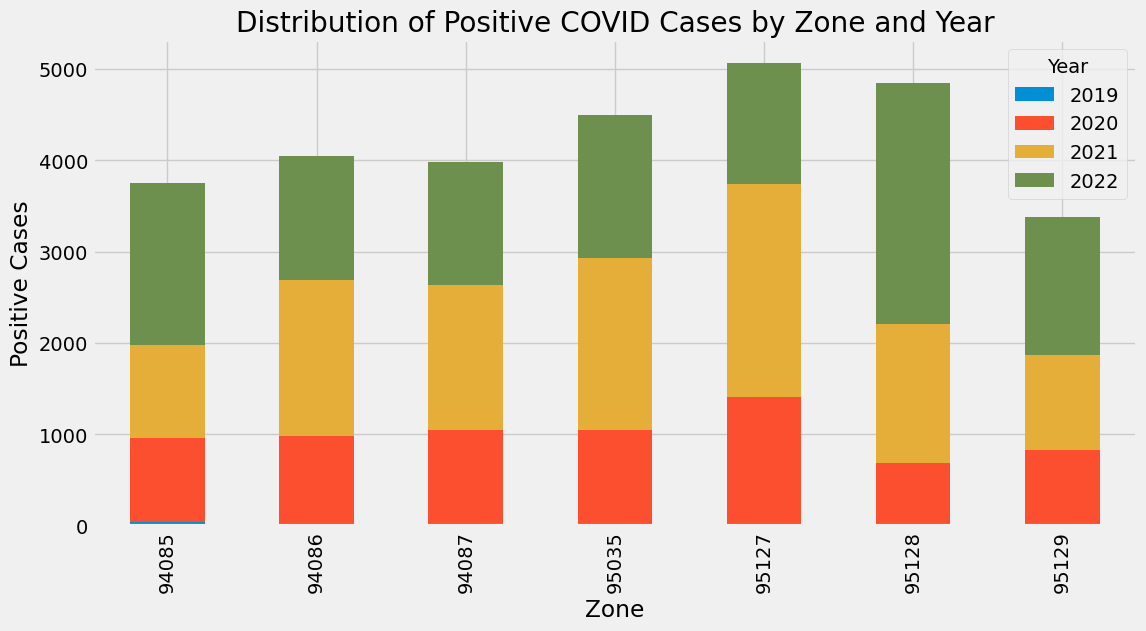

<Figure size 2000x500 with 0 Axes>

In [12]:
# Extract year from 'Midpoint Date'
df["Year"] = pd.DatetimeIndex(df.index).year
df["Month"] = pd.DatetimeIndex(df.index).month

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
pd.crosstab(df["zcta"], df["Year"], values=df["positive tests"], aggfunc="sum").plot(
    kind="bar", stacked=True, ax=plt.gca()
)

plt.xlabel("Zone")
plt.ylabel("Positive Cases")
plt.title("Distribution of Positive COVID Cases by Zone and Year")
plt.legend(title="Year", loc="upper right")
plt.show()
plt.savefig('reports/figures/02_TSA_2/03_distribution_of_positive_covid_cases_by_zone_and_year.png')

### 4. How can we effectively graphically represent the relationship between the population and the number of tests conducted?


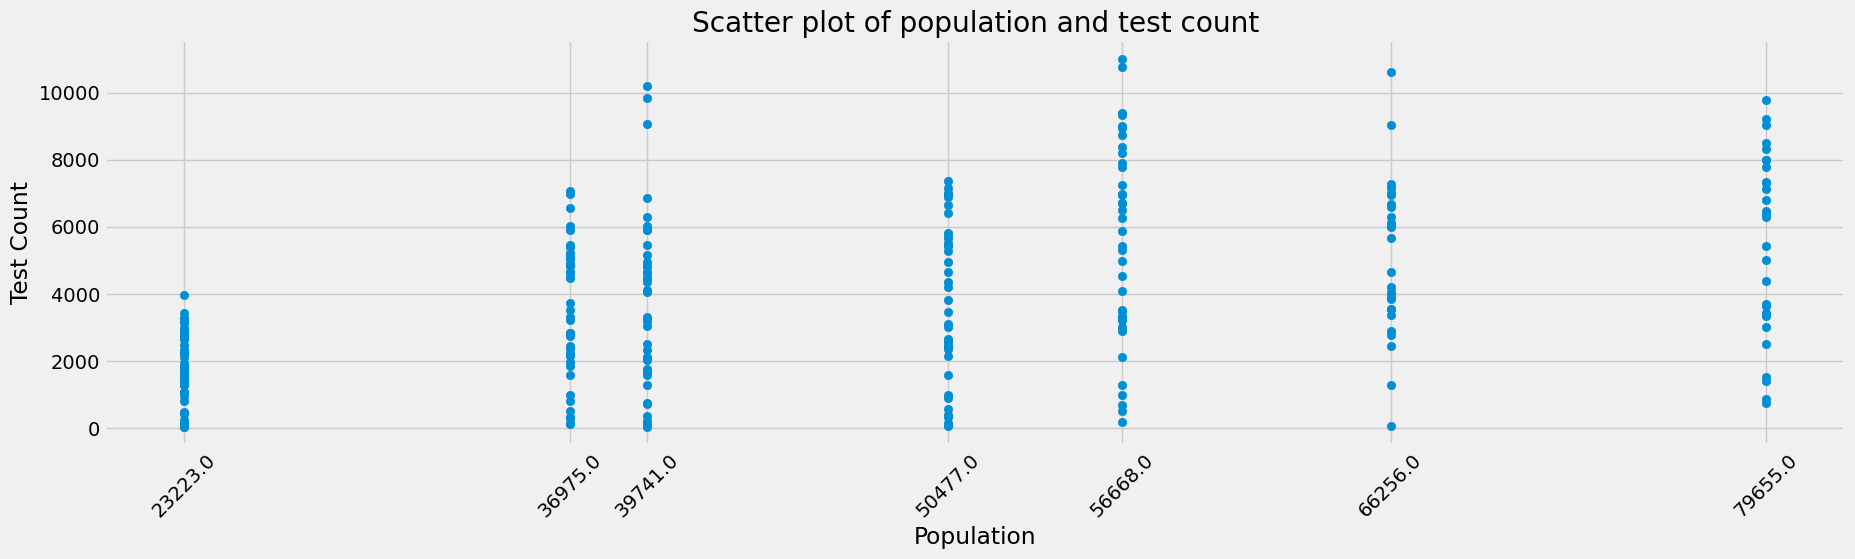

<Figure size 2000x500 with 0 Axes>

In [13]:
plt.scatter(df["population"], df["test count"])
plt.title("Scatter plot of population and test count")
plt.xlabel("Population")
plt.ylabel("Test Count")
plt.xticks(
    ticks=df["population"].unique(), labels=df["population"].unique(), rotation=45
)
plt.show()
plt.savefig('reports/figures/02_TSA_2/04_scatter_plot_of_population_and_test_count.png')

### 5. What are the 5 zones most heavily impacted by the coronavirus?


In [14]:
case_count_per_zone = df.groupby("zcta")["case count"].sum()
case_count_per_zone

zcta
94085    4987.0
94086    5704.0
94087    5437.0
95035    5997.0
95127    4869.0
95128    7792.0
95129    4458.0
Name: case count, dtype: float64

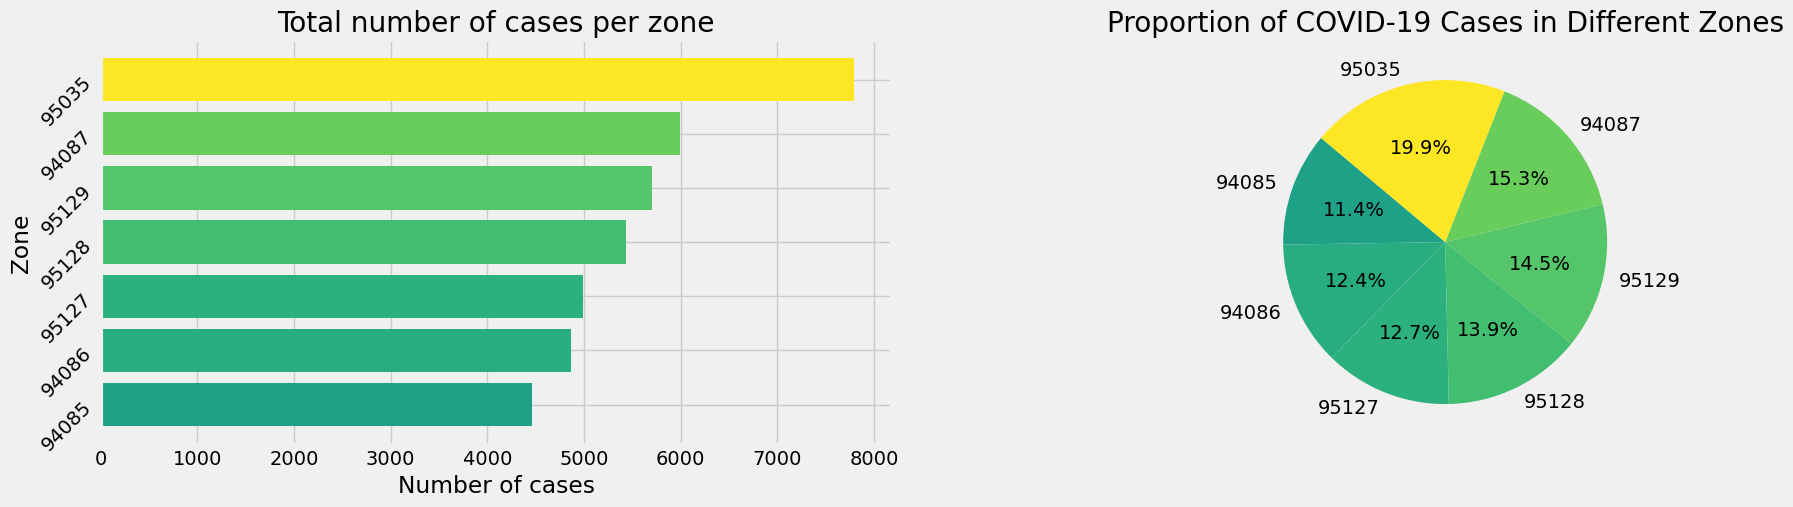

In [15]:
zones = df['zcta'].unique()
case_count_per_zone = df.groupby('zcta')['case count'].sum().sort_values()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(zones, case_count_per_zone, color=plt.cm.viridis(
    case_count_per_zone / max(case_count_per_zone)))
axs[0].set_title('Total number of cases per zone')
axs[0].set_xlabel('Number of cases')
axs[0].set_yticks(ticks=zones)
axs[0].set_yticklabels(labels=zones, rotation=45)
axs[0].set_ylabel('Zone')

axs[1].pie(case_count_per_zone, labels=zones, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.viridis(case_count_per_zone / max(case_count_per_zone)))
axs[1].set_title('Proportion of COVID-19 Cases in Different Zones')
fig.savefig('reports/figures/02_TSA_2/05_total_number_of_cases_per_zone.png')

### 6. What is the relationship between confirmed cases, tests conducted, and positive tests over time for each zone?

(The timeframe needs to be selected)


In [80]:
# I will choose the middle month in the df
middle_index = len(df) // 2
middle_date = df.iloc[middle_index]
middle_month = pd.DatetimeIndex(df.index).month[middle_index]
middle_year = pd.DatetimeIndex(df.index).year[middle_index]
middle_month, middle_year

(6, 2021)

In [81]:
# select the data for the middle month of the middle year
df_middle = df[(df['Year'] == middle_year) & (
    pd.DatetimeIndex(df.index).month == middle_month)]


# Identify the middle 6 months
start_month = middle_month - 2  # Subtract 2 to get 3 months before the middle month
end_month = middle_month + 3    # Add 3 to get 3 months after the middle month

# Select data for the middle 6 months
df_middle_6_months = df[(df['Year'] == middle_year) & (
    df['Month'].between(start_month, end_month, inclusive='both'))]
df_middle_6_months.head()

,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate,Year,Month
Midpoint Date,,,,,,,,,,
2021-04-07,94085,23223.0,2817.0,30.0,28.0,577.6,5.7,1.1,2021,4
2021-04-07,94086,50477.0,5655.0,63.0,52.0,533.5,4.9,1.1,2021,4
2021-04-07,94087,56668.0,6726.0,48.0,39.0,565.2,3.3,0.7,2021,4
2021-04-07,95035,79655.0,7992.0,129.0,114.0,477.8,6.8,1.6,2021,4
2021-04-07,95127,66256.0,6125.0,141.0,119.0,440.2,8.6,2.3,2021,4


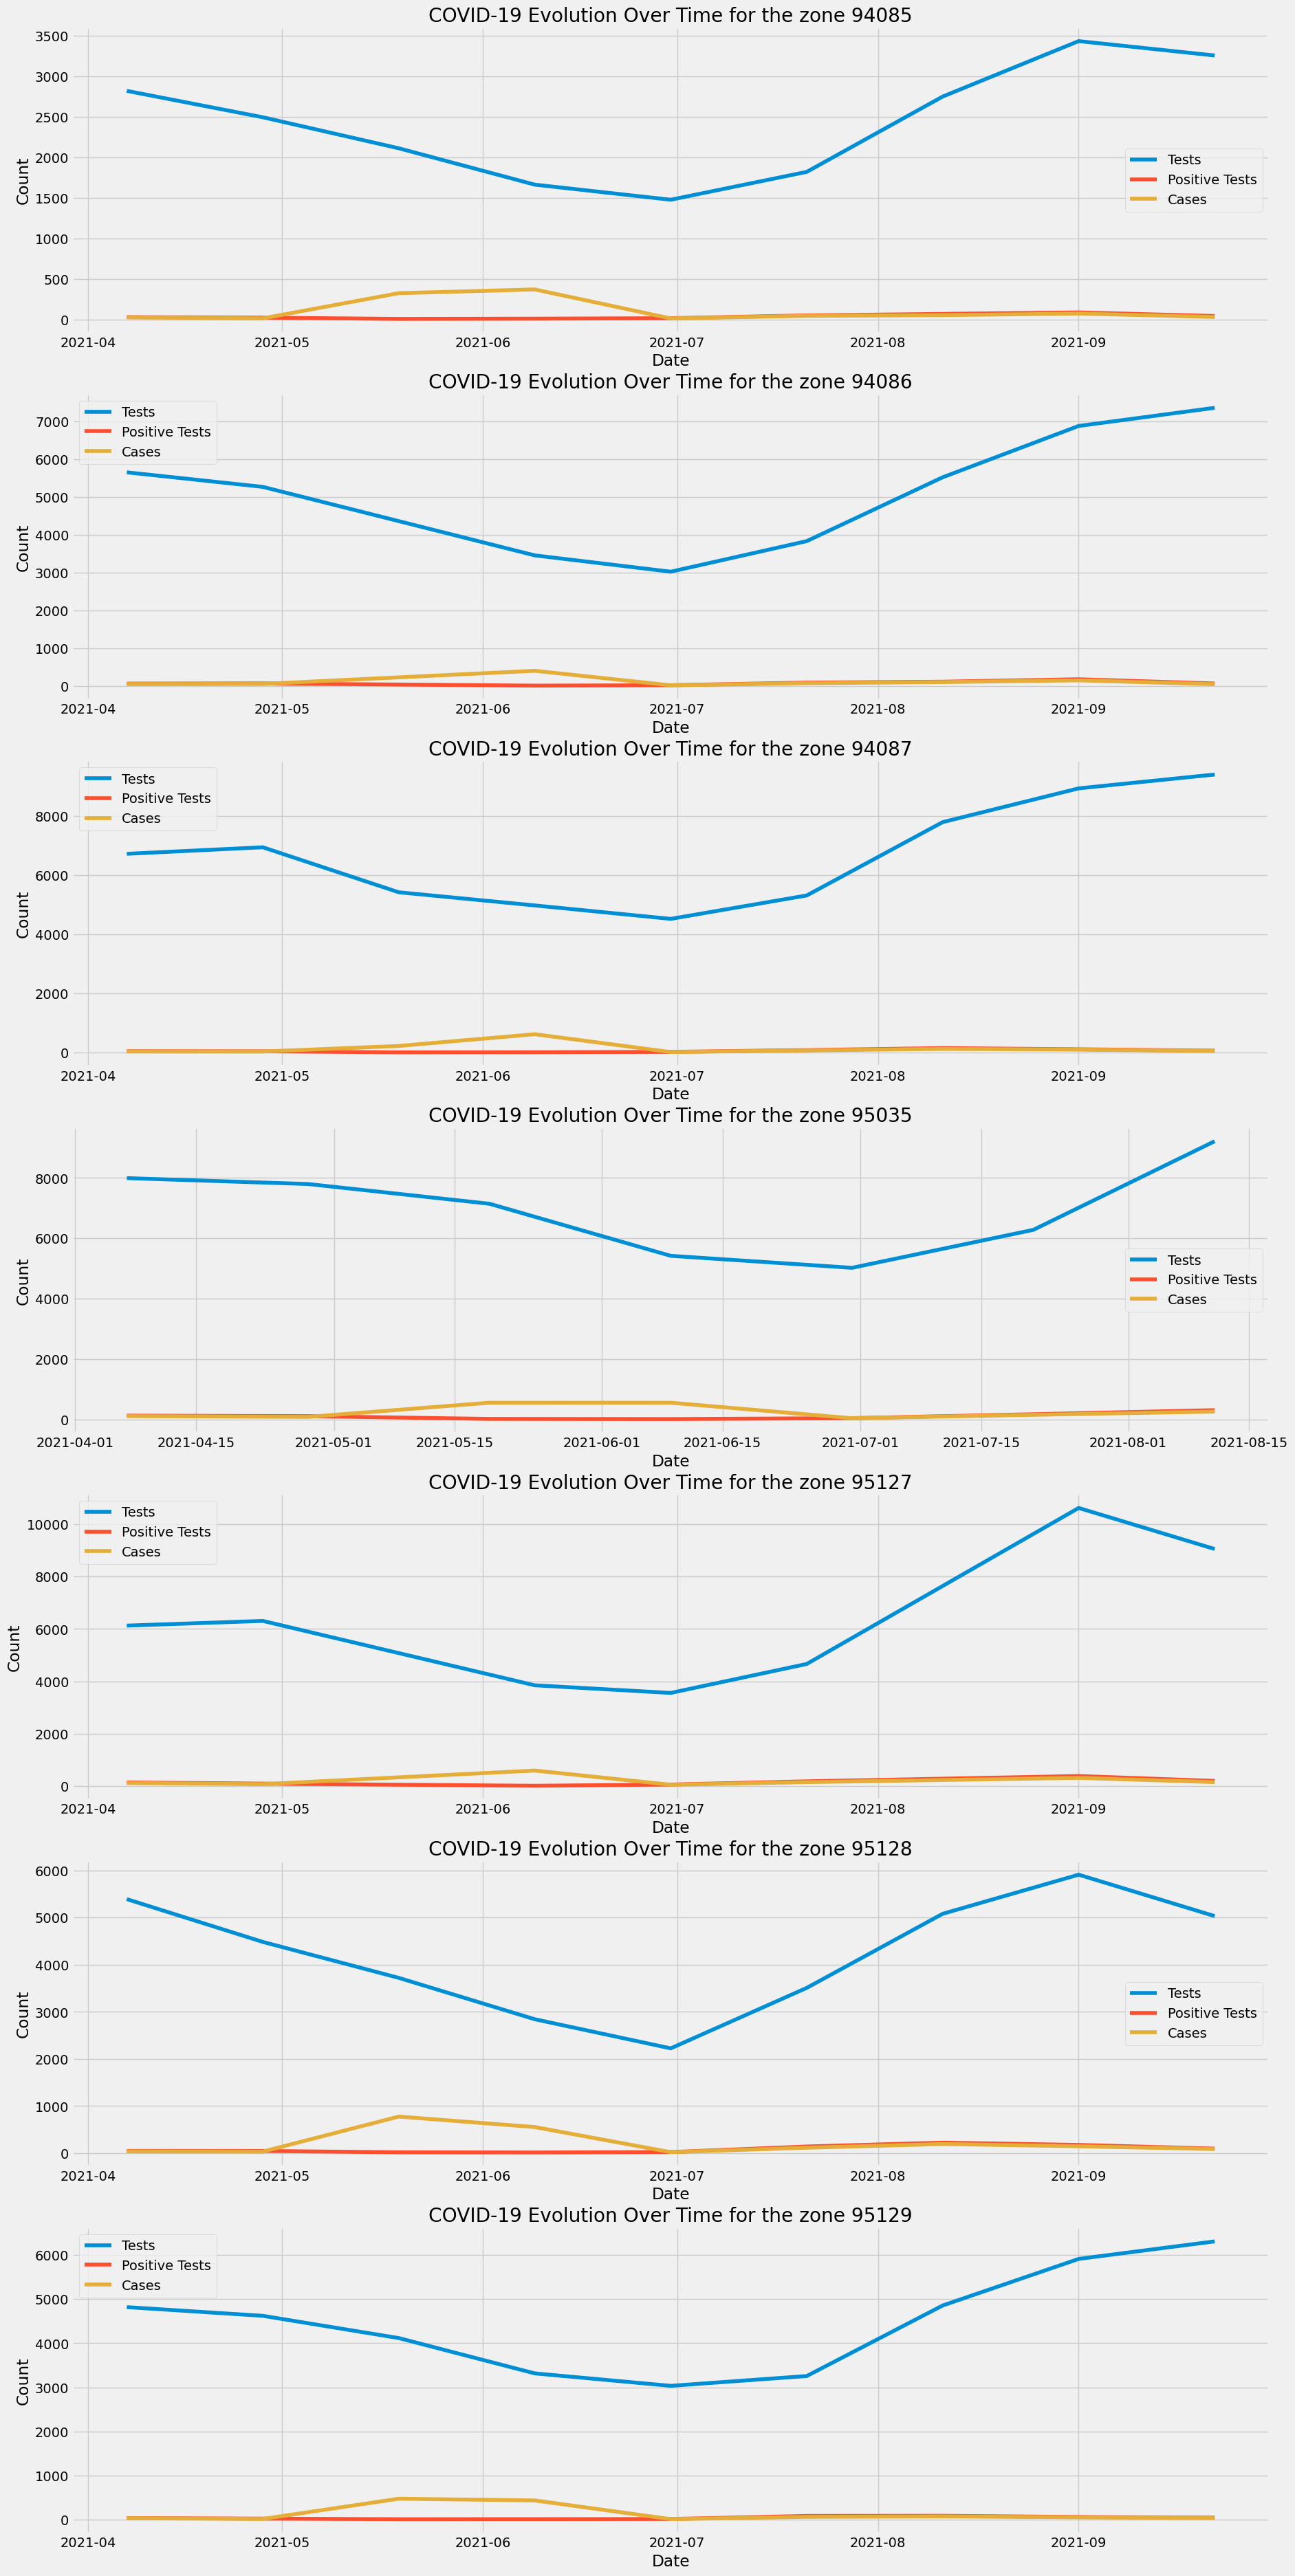

<Figure size 2000x500 with 0 Axes>

In [82]:

# Get unique zones in the DataFrame
unique_zones = df_middle_6_months["zcta"].unique()

# Plotting line charts for all zones
fig, axs = plt.subplots(7, 1, figsize = (20, 45))
for i, zone in enumerate(unique_zones):
    zone_data = df_middle_6_months[df_middle_6_months["zcta"] == zone]
    
    axs[i].plot(zone_data.index, zone_data["test count"], label=f"Tests")
    axs[i].plot(zone_data.index, zone_data["positive tests"], label=f"Positive Tests")
    axs[i].plot(zone_data.index, zone_data["case count"], label=f"Cases")
    axs[i].set_xlabel("Date", loc="center")
    axs[i].set_ylabel("Count")
    # axs[i].tick_params(axis="x", rotation=10)
    axs[i].set_title(f"COVID-19 Evolution Over Time for the zone {zone}")
    axs[i].legend()
    axs[i].grid(True)
plt.show()
plt.savefig(f'reports/figures/02_TSA_2/06_evolution_over_time_middle_6_months.png')